In [1]:
import numpy as np
import loadcifar10 as lc
import lls
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def plot(accuracy_per_class, accuracy, color, names):
    ind = np.arange(10)
    width = 0.5
    fig, ax = plt.subplots()
    rects = ax.bar(ind, accuracy_per_class, width, color='b')
    ax.set_ylabel('Accuracy')
    ax.set_title('LLS on %s CIFAR-10 accuracy per class, average accuracy = %f' % (color, accuracy))
    ax.set_xticks(ind)
    ax.set_xticklabels(names, rotation='vertical')
    plt.show()

In [4]:
def get_accuracy(predict, yte):
    accuracy_per_class = [0.] * 10
    for i in range(predict.shape[0]):
        if predict[i] == yte[i]:
            accuracy_per_class[yte[i]] += 1
    for i in range(10):
        accuracy_per_class[i] /= 1000
    accuracy = np.sum(predict == yte) / 10000
    return accuracy_per_class, accuracy

In [5]:
xtr, xgtr, ytr, xte, xgte, yte, names = lc.load_cifar('cifar-10-batches-py')
lls_o = lls.LLS()

In [6]:
lls_o.train(xtr, ytr)
predict = lls_o.predict(xte)

In [7]:
accuracy_per_class, accuracy = get_accuracy(predict, yte)

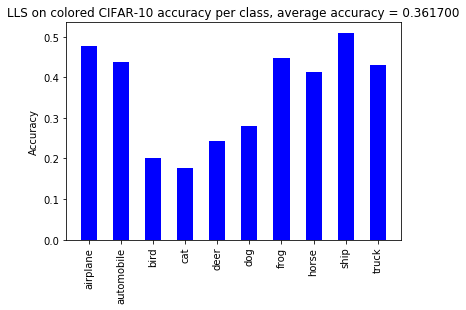

In [8]:
plot(accuracy_per_class, accuracy, 'colored', names)

In [9]:
lls_o.train(xgtr, ytr)
predict = lls_o.predict(xgte)

In [10]:
accuracy_per_class, accuracy = get_accuracy(predict, yte)

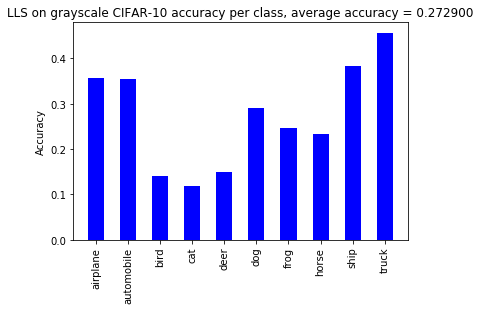

In [11]:
plot(accuracy_per_class, accuracy, 'grayscale', names)